In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import os, sys
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

* TSLA provides potential high returns with high volatility.
* BND contributes stability and low risk.
* SPY offers diversified, moderate-risk market exposure.

In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock symbols and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Fetch the data for each ticker with all relevant columns
data = yf.download(tickers, start=start_date, end=end_date)

# Create a dictionary to store individual DataFrames for each ticker with all required features
stock_data = {}

for ticker in tickers:
    # Select only the data for the specific ticker
    ticker_data = data.xs(ticker, axis=1, level=1)  # xs with level=1 gets the column specific to each ticker

    # Calculate the daily percentage change as a measure of volatility
    ticker_data['Volatility'] = ticker_data['Close'].pct_change()  # Daily returns

    # Store in dictionary
    stock_data[ticker] = ticker_data

# Example: Display the first few rows of each stock's DataFrame
for ticker, df in stock_data.items():
    print(f"{ticker} Data:")
    print(df.head())
    print("\n")


[*********************100%***********************]  3 of 3 completed

TSLA Data:
Price                      Adj Close      Close       High        Low  \
Date                                                                    
2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333   
2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667   
2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000   
2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333   
2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667   

Price                           Open    Volume  Volatility  
Date                                                        
2015-01-02 00:00:00+00:00  14.858000  71466000         NaN  
2015-01-05 00:00:00+00:00  14.303333  80527500   -0.042041  
2015-01-06 00:00:00+00:00  14.004000  93928500    0.005664  
2015-01-07 00:00:00+00:00  14.223333  44526000   -0.001562  
2015-01-08 00:00:00+00:00  14.187333  51637500   -0.001564  


BND Data:
Price                      Adj Close  


<ipython-input-1-a78e53145722>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Volatility'] = ticker_data['Close'].pct_change()  # Daily returns
<ipython-input-1-a78e53145722>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Volatility'] = ticker_data['Close'].pct_change()  # Daily returns
<ipython-input-1-a78e53145722>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

### TSLA

In [ ]:
tsla_data = stock_data['TSLA']
tsla_data.index = pd.to_datetime(tsla_data.index, format='%y-%m-%d')
tsla_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Volatility
Date,,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000,NaN
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500,-0.042041
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500,0.005664
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000,-0.001562
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500,-0.001564


In [ ]:
weekly_tsla_data= tsla_data.resample('W').mean()

In [ ]:
import numpy as np

# Assuming 'data_new' is your dataframe and 'Price' is the column of interest
# Split the 'Price' column into 8 chunks
chunks = np.array_split(weekly_tsla_data['Close'], 4)

# Compare means and variances
print("{:<5} | {:<10} | {:<10}".format("Chunk", "Mean", "Variance"))
print("-" * 30)
for i, chunk in enumerate(chunks, 1):
    mean = float(chunk.mean())  # Convert to float
    variance = float(chunk.var())  # Convert to float
    print("{:<5} | {:<10.6f} | {:<10.6f}".format(i, mean, variance))


Chunk | Mean       | Variance  
------------------------------
1     | 15.462421  | 6.287828  
2     | 20.157596  | 8.847492  
3     | 194.438765 | 11211.176284
4     | 216.930641 | 1742.985878


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


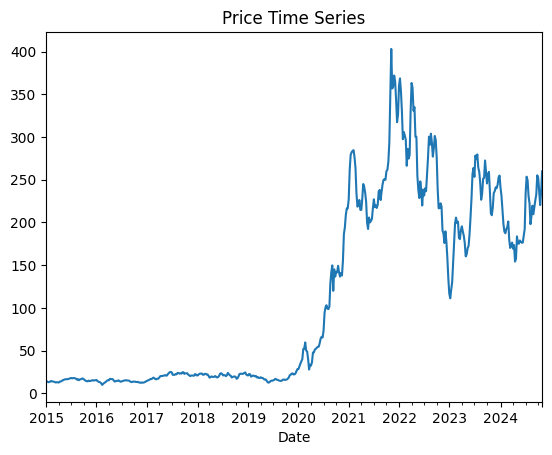

ADF Statistic: -0.6852052190299771
p-value: 0.8505445921496748
-----------------------------------------
ADF Statistic after differencing: -17.365615085406645
p-value after differencing: 5.173234229251928e-30


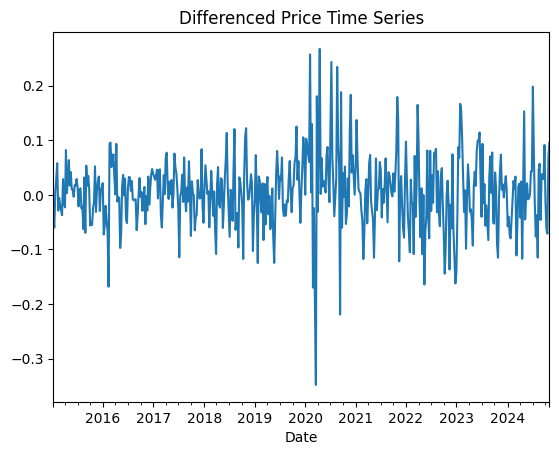

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data_new = weekly_tsla_data['Close'].copy()
data_new.index = pd.to_datetime(data_new.index)
# Assuming data_new is your column of interest
# 1. Visualize data
data_new.plot(title='Price Time Series')
plt.show()

# 2. Apply log transformation to reduce variance
data_new['Log_Price'] = np.log(data_new + 1)  # Log transformation

# 3. Check stationarity with ADF test
result = adfuller(data_new['Log_Price'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is non-stationary and differencing might be needed
# 4. Apply differencing to make the data stationary (if needed)
data_new['Price_Diff'] = data_new['Log_Price'].diff().dropna()

# 5. Check stationarity again after differencing
result_diff = adfuller(data_new['Price_Diff'].dropna())
print(f'-----------------------------------------')
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')

# 6. Visualize differenced data
data_new['Price_Diff'].plot(title='Differenced Price Time Series')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame and 'Close' is the column you want to test
result = adfuller(data_new['Price_Diff'])

# Extract and print the test statistic and p-value
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])

# Extract and print critical values (for 1%, 5%, and 10% significance levels)
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

# Interpretation
if result[1] < 0.05:
    print("The time series is stationary (reject H0).")
else:
    print("The time series is non-stationary (fail to reject H0).")


ADF Test Statistic: -17.365615085406645
p-value: 5.173234229251928e-30
Critical Value (1%): -3.443186695642769
Critical Value (5%): -2.86720156693697
Critical Value (10%): -2.569785402984619
The time series is stationary (reject H0).


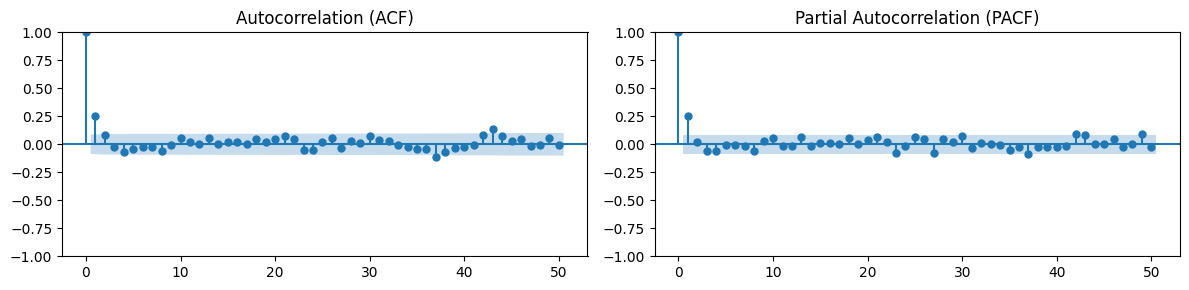

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming data_new['Price_Diff'] exists and contains the differenced series
plt.figure(figsize=(12, 3))

# Autocorrelation (ACF) plot
plt.subplot(121)
plot_acf(data_new['Price_Diff'].dropna(), lags=50, ax=plt.gca(), title="Autocorrelation (ACF)")

# Partial Autocorrelation (PACF) plot
plt.subplot(122)
plot_pacf(data_new['Price_Diff'].dropna(), lags=50, ax=plt.gca(), title="Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()


* The presence of two significant spikes at the first lags in both the ACF and PACF plots suggests two distinct types of autocorrelation in your data:

- Long-Term Lag (1): The significant spike at lag 1 indicates strong autocorrelation at the previous time step, common in time series with persistence (e.g., price trends that extend into the next period). This suggests that an autoregressive (AR) term might help capture this structure.

**ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 0.06690502590310204
Mean Squared Error (MSE): 0.007409886052574492
Root Mean Squared Error (RMSE): 0.08608069500517809


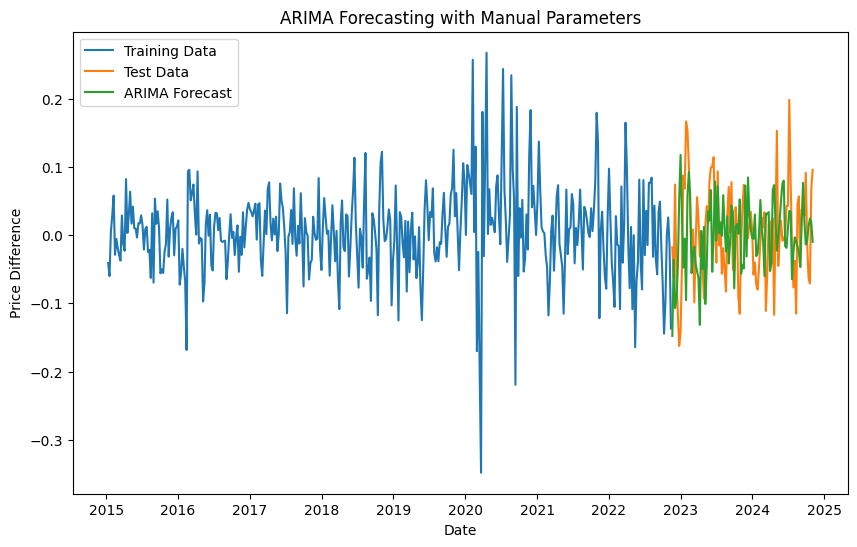

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Define the ARIMA model based on ACF/PACF analysis
# Using (1, 1, 0) for non-seasonal ARIMA model as per your analysis
model = ARIMA(train_data, order=(1, 1, 180))  # Adjust (p, d, q) based on ACF/PACF

# Fit the model
model_fit = model.fit()

# Forecasting for the length of the test set
forecast = model_fit.forecast(steps=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecasting with Manual Parameters")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()

**SARIMA**

Mean Absolute Error (MAE): 0.07167567211438847
Mean Squared Error (MSE): 0.007736632388746108
Root Mean Squared Error (RMSE): 0.08795812861098233


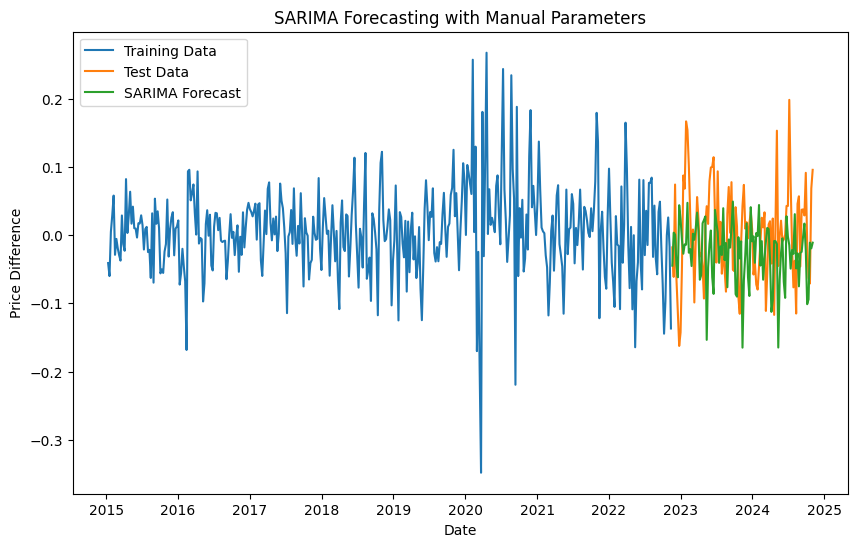

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Define the SARIMA model based on ACF/PACF analysis
# Using (1, 1, 0) for non-seasonal and (1, 1, 0, 52) for seasonal terms as per analysis
model = SARIMAX(train_data, order=(2, 1, 0), seasonal_order=(2, 1, 0, 26), enforce_stationarity=False)

# Fit the model
model_fit2 = model.fit(disp=False)

# Forecasting for the length of the test set
forecast = model_fit2.forecast(steps=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Forecasting with Manual Parameters")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


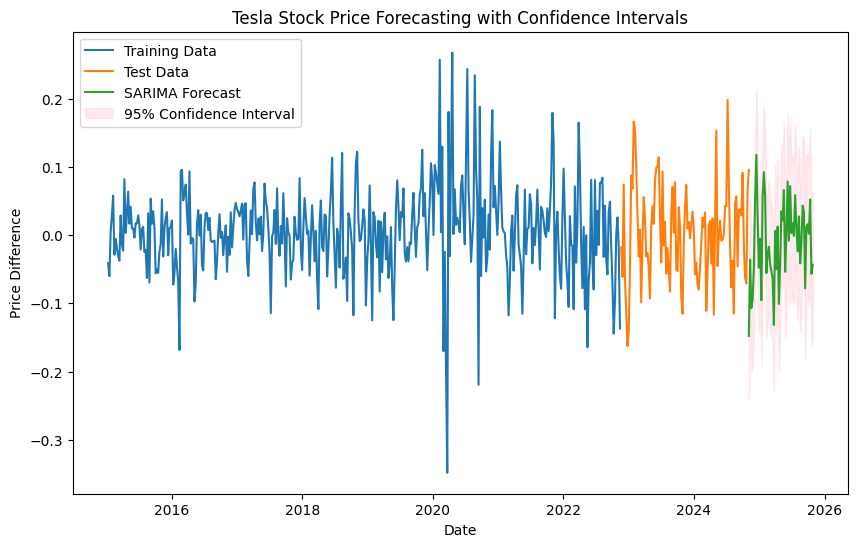

In [ ]:
# Forecasting with confidence intervals
forecast_object = model_fit.get_forecast(steps=52)  # Adjust steps as needed
forecast_mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# Create forecast dates (assuming test_data.index[-1] is the last date of your training data)
forecast_dates = pd.date_range(start=test_data.index[-1], periods=52, freq='W')  # Adjust 'freq' as needed (e.g., 'D' for daily)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_dates, forecast_mean, label='SARIMA Forecast')
plt.fill_between(forecast_dates,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')
plt.legend()
plt.title("Tesla Stock Price Forecasting with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


In [ ]:
# prompt: MOUNT DRIVE

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Create a DataFrame to store forecasted data and confidence intervals
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Mean': forecast_mean,
    'Lower_95_CI': conf_int.iloc[:, 0],
    'Upper_95_CI': conf_int.iloc[:, 1]
})

# Save to a CSV file
forecast_df.to_csv('/content/drive/My Drive/10Academy/week11/TSLA_WEEKLY_forecasted_data.csv', index=False)

# Display the first few rows to verify
print(forecast_df.head())


                                               Date  Forecasted_Mean  \
2022-11-20 00:00:00+00:00 2024-11-03 00:00:00+00:00        -0.147724   
2022-11-27 00:00:00+00:00 2024-11-10 00:00:00+00:00        -0.035864   
2022-12-04 00:00:00+00:00 2024-11-17 00:00:00+00:00        -0.106975   
2022-12-11 00:00:00+00:00 2024-11-24 00:00:00+00:00        -0.094726   
2022-12-18 00:00:00+00:00 2024-12-01 00:00:00+00:00        -0.048254   

                           Lower_95_CI  Upper_95_CI  
2022-11-20 00:00:00+00:00    -0.240864    -0.054585  
2022-11-27 00:00:00+00:00    -0.130533     0.058805  
2022-12-04 00:00:00+00:00    -0.202145    -0.011806  
2022-12-11 00:00:00+00:00    -0.189886     0.000434  
2022-12-18 00:00:00+00:00    -0.143435     0.046928  


**LSTM**

In [ ]:
!pip install tensorflow

In [ ]:
!pip uninstall tensorflow -y  # Uninstall the current TensorFlow version
!pip install tensorflow==2.12  # Reinstall a specific version (change version if necessary)


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
 

Epoch 1/20
13/13 [==============================] - 5s 7ms/step - loss: 0.1756
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0202
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0181
Epoch 4/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0126
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0123
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 8/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 9/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 10/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 11/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0121
Epoch 12/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 13/20
13/13 [=============================

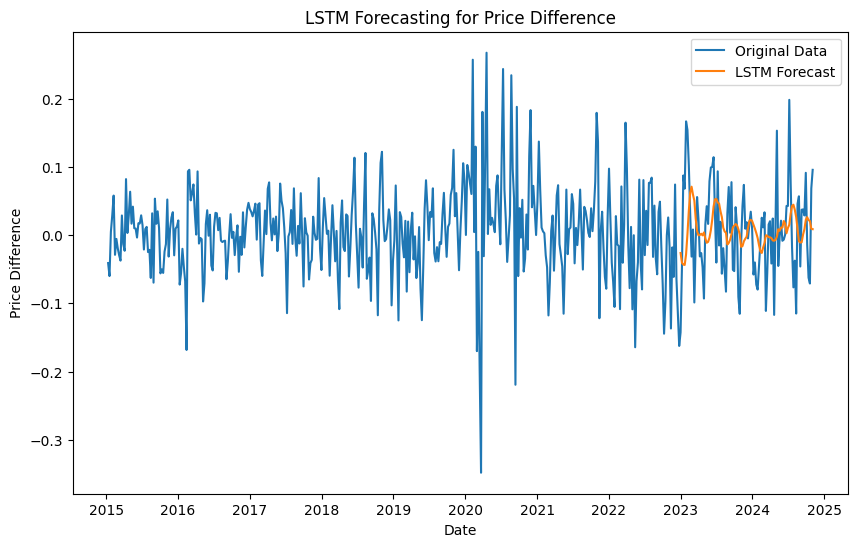

In [ ]:
import numpy as np
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Scale the data (LSTM works better with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Prepare the data for LSTM (X, y pairs)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 6  # Look back 60 time steps
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input data for LSTM: [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer for forecasting

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Forecasting
forecast_scaled = model.predict(X_test)

# Inverse transform to get actual values back
forecast = scaler.inverse_transform(forecast_scaled)

# Calculate performance metrics
mae = mean_absolute_error(test_data[time_step:], forecast)
mse = mean_squared_error(test_data[time_step:], forecast)
rmse = np.sqrt(mse)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data_new['Price_Diff'], label='Original Data')
plt.plot(test_data.index[time_step:], forecast, label='LSTM Forecast')
plt.legend()
plt.title("LSTM Forecasting for Price Difference")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


### BND

In [ ]:
bnd_data = stock_data['BND']
bnd_data.index = pd.to_datetime(bnd_data.index, format='%y-%m-%d')
bnd_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Volatility
Date,,,,,,,
2015-01-02 00:00:00+00:00,63.358746,82.650002,82.690002,82.419998,82.430000,2218800,NaN
2015-01-05 00:00:00+00:00,63.542713,82.889999,82.919998,82.699997,82.739998,5820100,0.002904
2015-01-06 00:00:00+00:00,63.726746,83.129997,83.379997,83.029999,83.029999,3887600,0.002895
2015-01-07 00:00:00+00:00,63.765068,83.180000,83.279999,83.050003,83.139999,2433400,0.000602
2015-01-08 00:00:00+00:00,63.665401,83.050003,83.110001,82.970001,83.110001,1873400,-0.001563


In [ ]:
weekly_bnd_data= bnd_data.resample('W').mean()

In [ ]:
import numpy as np

# Assuming 'data_new' is your dataframe and 'Price' is the column of interest
# Split the 'Price' column into 8 chunks
chunks = np.array_split(weekly_bnd_data['Close'], 4)

# Compare means and variances
print("{:<5} | {:<10} | {:<10}".format("Chunk", "Mean", "Variance"))
print("-" * 30)
for i, chunk in enumerate(chunks, 1):
    mean = float(chunk.mean())  # Convert to float
    variance = float(chunk.var())  # Convert to float
    print("{:<5} | {:<10.6f} | {:<10.6f}".format(i, mean, variance))


Chunk | Mean       | Variance  
------------------------------
1     | 82.178636  | 1.285004  
2     | 80.873767  | 3.828895  
3     | 85.412539  | 8.716733  
4     | 72.743544  | 3.020315  


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame and 'Close' is the column you want to test
result = adfuller(weekly_bnd_data['Close'])

# Extract and print the test statistic and p-value
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])

# Extract and print critical values (for 1%, 5%, and 10% significance levels)
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

# Interpretation
if result[1] < 0.05:
    print("The time series is stationary (reject H0).")
else:
    print("The time series is non-stationary (fail to reject H0).")


ADF Test Statistic: -0.9417620250001985
p-value: 0.773908784184901
Critical Value (1%): -3.4432372923913124
Critical Value (5%): -2.86722383510113
Critical Value (10%): -2.5697972702806613
The time series is non-stationary (fail to reject H0).


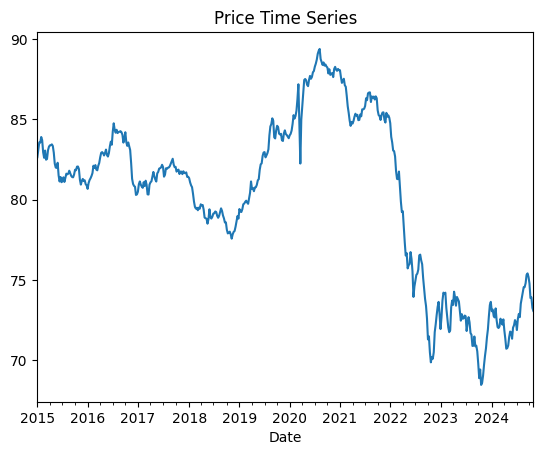

ADF Statistic: -0.9417620250001985
p-value: 0.773908784184901
-----------------------------------------
ADF Statistic after differencing: -11.452896767120102
p-value after differencing: 5.799807881904944e-21


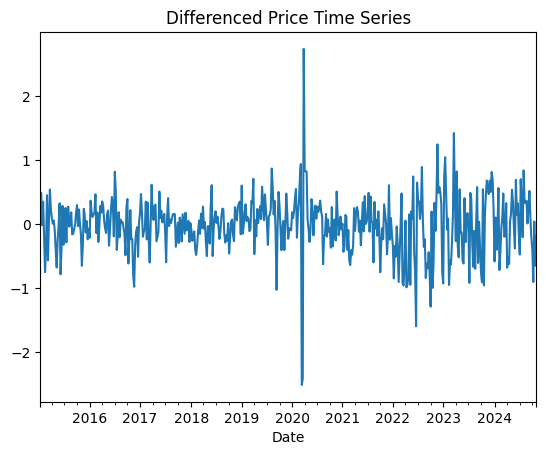

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data_new = weekly_bnd_data['Close'].copy()
data_new.index = pd.to_datetime(data_new.index)
# Assuming data_new is your column of interest
# 1. Visualize data
data_new.plot(title='Price Time Series')
plt.show()

# 3. Check stationarity with ADF test
result = adfuller(data_new.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is non-stationary and differencing might be needed
# 4. Apply differencing to make the data stationary (if needed)
data_new['Price_Diff'] = data_new.diff().dropna()

# 5. Check stationarity again after differencing
result_diff = adfuller(data_new['Price_Diff'].dropna())
print(f'-----------------------------------------')
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')

# 6. Visualize differenced data
data_new['Price_Diff'].plot(title='Differenced Price Time Series')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame and 'Close' is the column you want to test
result = adfuller(data_new['Price_Diff'])

# Extract and print the test statistic and p-value
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])

# Extract and print critical values (for 1%, 5%, and 10% significance levels)
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

# Interpretation
if result[1] < 0.05:
    print("The time series is stationary (reject H0).")
else:
    print("The time series is non-stationary (fail to reject H0).")


ADF Test Statistic: -11.452896767120102
p-value: 5.799807881904944e-21
Critical Value (1%): -3.4432372923913124
Critical Value (5%): -2.86722383510113
Critical Value (10%): -2.5697972702806613
The time series is stationary (reject H0).


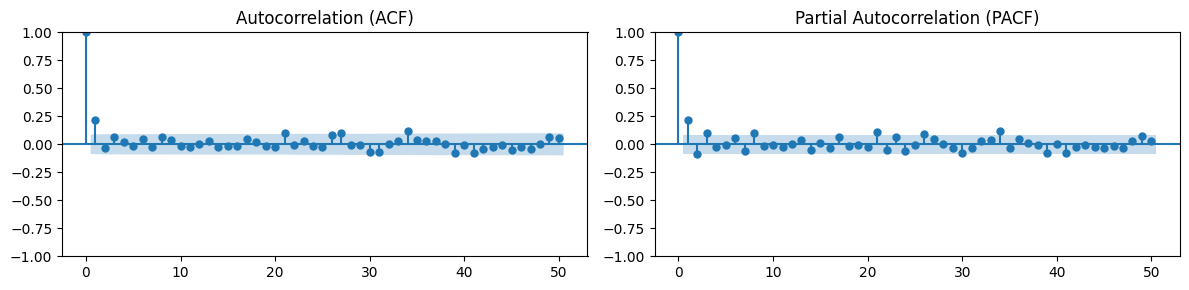

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming data_new['Price_Diff'] exists and contains the differenced series
plt.figure(figsize=(12, 3))

# Autocorrelation (ACF) plot
plt.subplot(121)
plot_acf(data_new['Price_Diff'].dropna(), lags=50, ax=plt.gca(), title="Autocorrelation (ACF)")

# Partial Autocorrelation (PACF) plot
plt.subplot(122)
plot_pacf(data_new['Price_Diff'].dropna(), lags=50, ax=plt.gca(), title="Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()


* The presence of two significant spikes at the first lags in both the ACF and PACF plots suggests two distinct types of autocorrelation in your data:

- Long-Term Lag (1): The significant spike at lag 1 indicates strong autocorrelation at the previous time step, common in time series with persistence (e.g., price trends that extend into the next period). This suggests that an autoregressive (AR) term might help capture this structure.

**ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 0.5163896710651854
Mean Squared Error (MSE): 0.4167796418046018
Root Mean Squared Error (RMSE): 0.6455847286023747


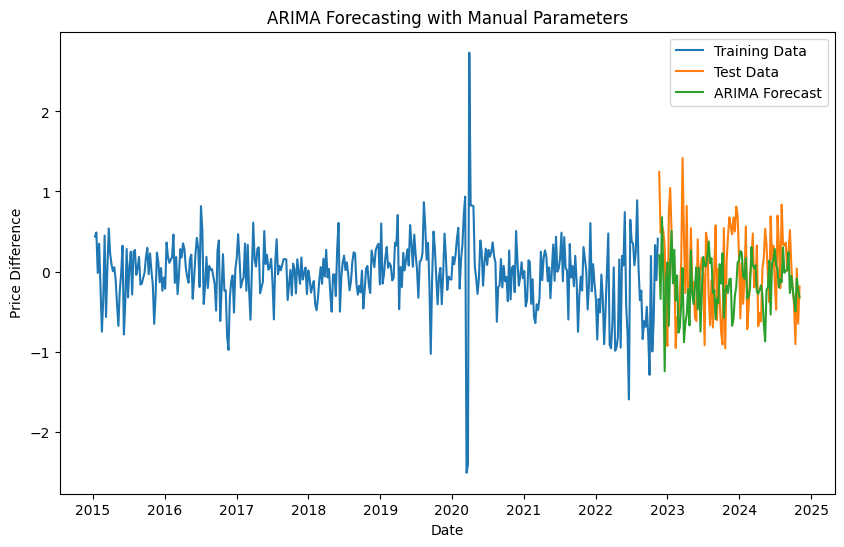

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Define the ARIMA model based on ACF/PACF analysis
# Using (1, 1, 0) for non-seasonal ARIMA model as per your analysis
model = ARIMA(train_data, order=(1, 1, 180))  # Adjust (p, d, q) based on ACF/PACF

# Fit the model
model_fit = model.fit()

# Forecasting for the length of the test set
forecast = model_fit.forecast(steps=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecasting with Manual Parameters")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()

**SARIMA**

Mean Absolute Error (MAE): 0.5253950396907435
Mean Squared Error (MSE): 0.4339249661750113
Root Mean Squared Error (RMSE): 0.658729812726744


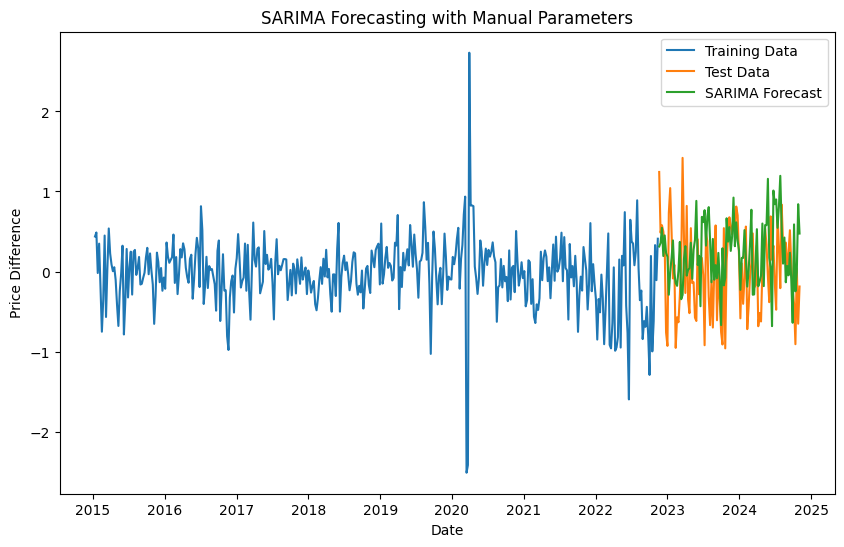

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Define the SARIMA model based on ACF/PACF analysis
# Using (1, 1, 0) for non-seasonal and (1, 1, 0, 52) for seasonal terms as per analysis
model = SARIMAX(train_data, order=(1, 1, 0), seasonal_order=(1, 1, 0, 52), enforce_stationarity=False)

# Fit the model
model_fit = model.fit(disp=False)

# Forecasting for the length of the test set
forecast = model_fit.forecast(steps=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Forecasting with Manual Parameters")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


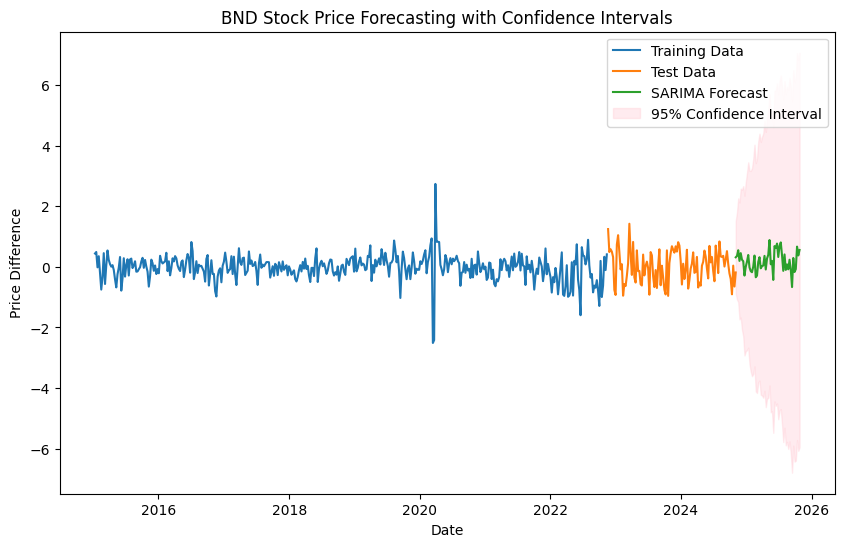

In [ ]:
# Forecasting with confidence intervals
forecast_object = model_fit.get_forecast(steps=52)  # Adjust steps as needed
forecast_mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# Create forecast dates (assuming test_data.index[-1] is the last date of your training data)
forecast_dates = pd.date_range(start=test_data.index[-1], periods=52, freq='W')  # Adjust 'freq' as needed (e.g., 'D' for daily)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_dates, forecast_mean, label='SARIMA Forecast')
plt.fill_between(forecast_dates,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')
plt.legend()
plt.title("BND Stock Price Forecasting with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


In [ ]:
# prompt: mount drive'

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Create a DataFrame to store forecasted data and confidence intervals
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Mean': forecast_mean,
    'Lower_95_CI': conf_int.iloc[:, 0],
    'Upper_95_CI': conf_int.iloc[:, 1]
})

# Save to a CSV file
forecast_df.to_csv('/content/drive/My Drive/10Academy/week11/BND_Weely_forecasted_data.csv', index=False)

# Display the first few rows to verify
print(forecast_df.head())


                                               Date  Forecasted_Mean  \
2022-11-20 00:00:00+00:00 2024-11-03 00:00:00+00:00         0.312809   
2022-11-27 00:00:00+00:00 2024-11-10 00:00:00+00:00         0.357032   
2022-12-04 00:00:00+00:00 2024-11-17 00:00:00+00:00         0.546057   
2022-12-11 00:00:00+00:00 2024-11-24 00:00:00+00:00         0.193832   
2022-12-18 00:00:00+00:00 2024-12-01 00:00:00+00:00         0.451045   

                           Lower_95_CI  Upper_95_CI  
2022-11-20 00:00:00+00:00    -0.881478     1.507096  
2022-11-27 00:00:00+00:00    -1.079698     1.793762  
2022-12-04 00:00:00+00:00    -1.165251     2.257364  
2022-12-11 00:00:00+00:00    -1.733373     2.121036  
2022-12-18 00:00:00+00:00    -1.676244     2.578334  


**LSTM**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2138
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0353 
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060
Epoch 16/20
13/13 ━━━━━━━

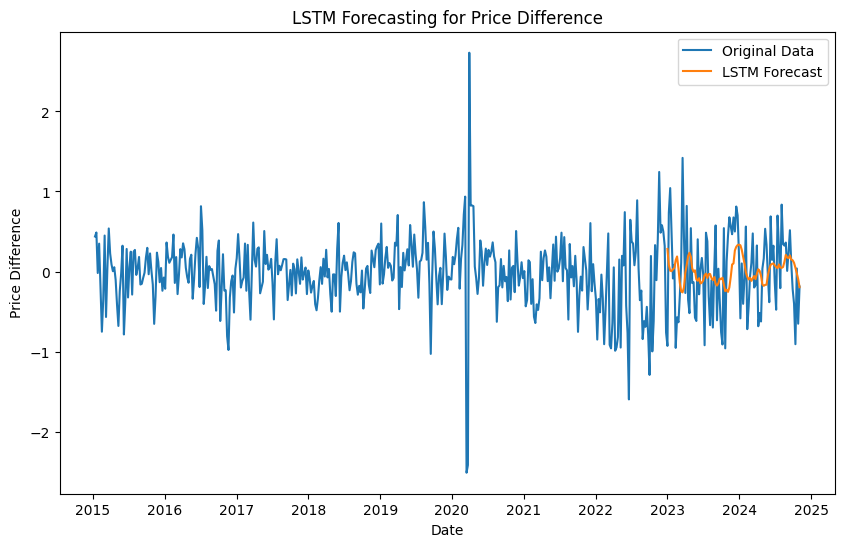

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Scale the data (LSTM works better with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Prepare the data for LSTM (X, y pairs)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 6  # Look back 60 time steps
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input data for LSTM: [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer for forecasting

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Forecasting
forecast_scaled = model.predict(X_test)

# Inverse transform to get actual values back
forecast = scaler.inverse_transform(forecast_scaled)

# Calculate performance metrics
mae = mean_absolute_error(test_data[time_step:], forecast)
mse = mean_squared_error(test_data[time_step:], forecast)
rmse = np.sqrt(mse)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data_new['Price_Diff'], label='Original Data')
plt.plot(test_data.index[time_step:], forecast, label='LSTM Forecast')
plt.legend()
plt.title("LSTM Forecasting for Price Difference")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


### SPY

In [ ]:
spy_data = stock_data['SPY']
spy_data.index = pd.to_datetime(spy_data.index, format='%y-%m-%d')
spy_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Volatility
Date,,,,,,,
2015-01-02 00:00:00+00:00,173.173737,205.429993,206.880005,204.179993,206.380005,121465900,NaN
2015-01-05 00:00:00+00:00,170.046341,201.720001,204.369995,201.350006,204.169998,169632600,-0.018060
2015-01-06 00:00:00+00:00,168.444626,199.820007,202.720001,198.860001,202.089996,209151400,-0.009419
2015-01-07 00:00:00+00:00,170.543686,202.309998,202.720001,200.880005,201.419998,125346700,0.012461
2015-01-08 00:00:00+00:00,173.569946,205.899994,206.160004,203.990005,204.009995,147217800,0.017745


In [ ]:
# prompt: weekly

weekly_spy_data = spy_data.resample('W').mean()

In [ ]:
import numpy as np

# Assuming 'data_new' is your dataframe and 'Price' is the column of interest
# Split the 'Price' column into 8 chunks
chunks = np.array_split(weekly_spy_data['Close'], 4)

# Compare means and variances
print("{:<5} | {:<10} | {:<10}".format("Chunk", "Mean", "Variance"))
print("-" * 30)
for i, chunk in enumerate(chunks, 1):
    mean = float(chunk.mean())  # Convert to float
    variance = float(chunk.var())  # Convert to float
    print("{:<5} | {:<10.6f} | {:<10.6f}".format(i, mean, variance))


Chunk | Mean       | Variance  
------------------------------
1     | 212.904942 | 175.785692
2     | 275.044464 | 308.845237
3     | 382.137489 | 3706.090335
4     | 453.792786 | 3919.589057


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


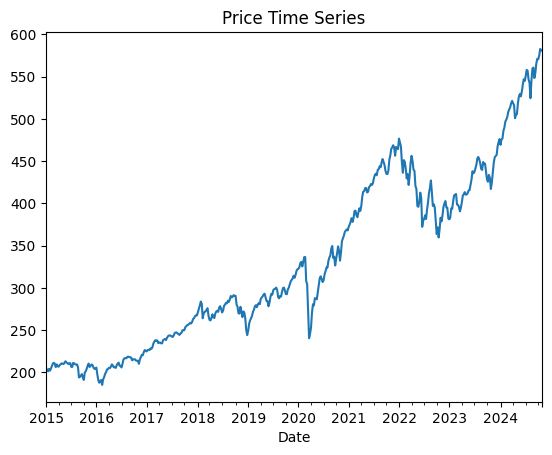

ADF Statistic: -0.2496202873244878
p-value: 0.9323427314111139
-----------------------------------------
ADF Statistic after differencing: -14.914465870750856
p-value after differencing: 1.442108213914794e-27


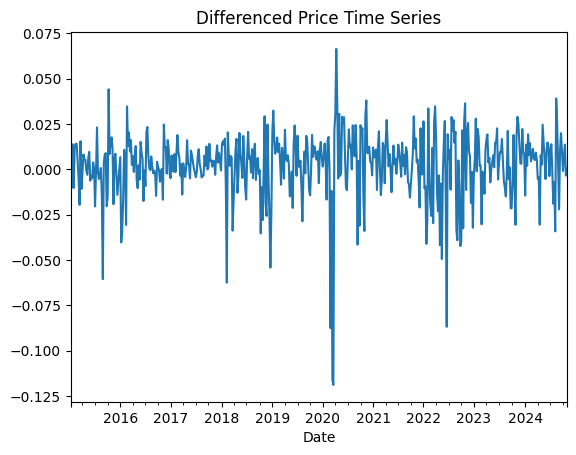

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data_new = weekly_spy_data['Close'].copy()
data_new.index = pd.to_datetime(data_new.index)
# Assuming data_new is your column of interest
# 1. Visualize data
data_new.plot(title='Price Time Series')
plt.show()

# 2. Apply log transformation to reduce variance
data_new['Log_Price'] = np.log(data_new + 1)  # Log transformation

# 3. Check stationarity with ADF test
result = adfuller(data_new['Log_Price'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is non-stationary and differencing might be needed
# 4. Apply differencing to make the data stationary (if needed)
data_new['Price_Diff'] = data_new['Log_Price'].diff().dropna()

# 5. Check stationarity again after differencing
result_diff = adfuller(data_new['Price_Diff'].dropna())
print(f'-----------------------------------------')
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')

# 6. Visualize differenced data
data_new['Price_Diff'].plot(title='Differenced Price Time Series')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame and 'Close' is the column you want to test
result = adfuller(data_new['Price_Diff'])

# Extract and print the test statistic and p-value
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])

# Extract and print critical values (for 1%, 5%, and 10% significance levels)
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

# Interpretation
if result[1] < 0.05:
    print("The time series is stationary (reject H0).")
else:
    print("The time series is non-stationary (fail to reject H0).")


ADF Test Statistic: -14.914465870750856
p-value: 1.442108213914794e-27
Critical Value (1%): -3.4432119442564324
Critical Value (5%): -2.8672126791646955
Critical Value (10%): -2.569791324979607
The time series is stationary (reject H0).


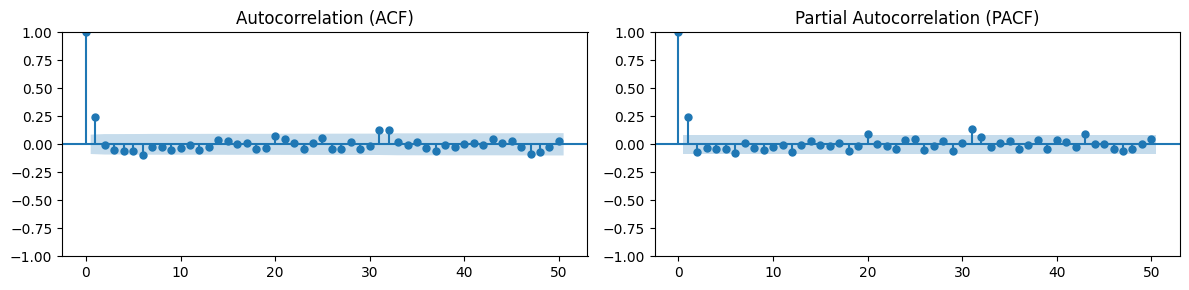

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming data_new['Price_Diff'] exists and contains the differenced series
plt.figure(figsize=(12, 3))

# Autocorrelation (ACF) plot
plt.subplot(121)
plot_acf(data_new['Price_Diff'].dropna(), lags=50, ax=plt.gca(), title="Autocorrelation (ACF)")

# Partial Autocorrelation (PACF) plot
plt.subplot(122)
plot_pacf(data_new['Price_Diff'].dropna(), lags=50, ax=plt.gca(), title="Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()


* The presence of two significant spikes at the first lags in both the ACF and PACF plots suggests two distinct types of autocorrelation in your data:

- Long-Term Lag (1): The significant spike at lag 1 indicates strong autocorrelation at the previous time step, common in time series with persistence (e.g., price trends that extend into the next period). This suggests that an autoregressive (AR) term might help capture this structure.

**ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Define the ARIMA model based on ACF/PACF analysis
# Using (1, 1, 0) for non-seasonal ARIMA model as per your analysis
model = ARIMA(train_data, order=(1, 1, 180))  # Adjust (p, d, q) based on ACF/PACF

# Fit the model
model_fit = model.fit()

# Forecasting for the length of the test set
forecast = model_fit.forecast(steps=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecasting with Manual Parameters")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


**SARIMA**

Mean Absolute Error (MAE): 0.018772073215519536
Mean Squared Error (MSE): 0.0005541745058079211
Root Mean Squared Error (RMSE): 0.02354091132067578


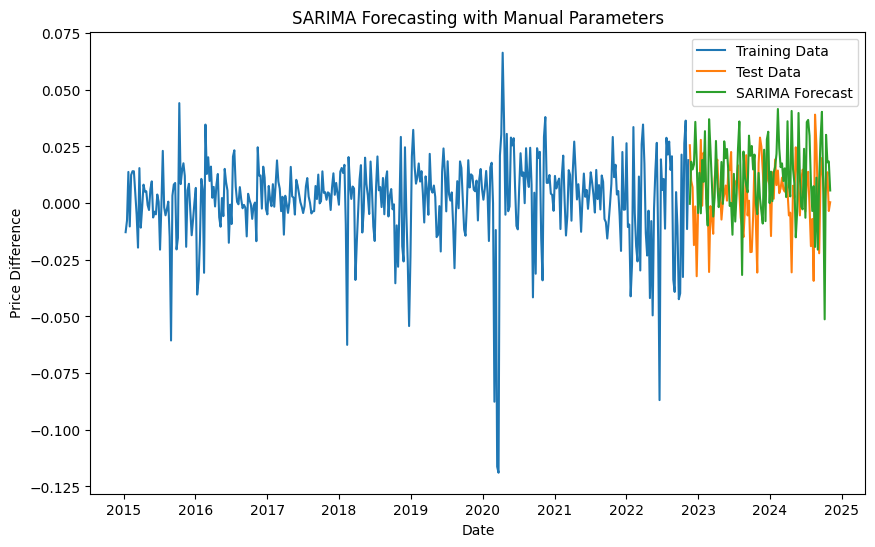

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Define the SARIMA model based on ACF/PACF analysis
# Using (1, 1, 0) for non-seasonal and (1, 1, 0, 52) for seasonal terms as per analysis
model = SARIMAX(train_data, order=(1, 1, 0), seasonal_order=(1, 1, 0, 60), enforce_stationarity=False)

# Fit the model
model_fit = model.fit(disp=False)

# Forecasting for the length of the test set
forecast = model_fit.forecast(steps=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Forecasting with Manual Parameters")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


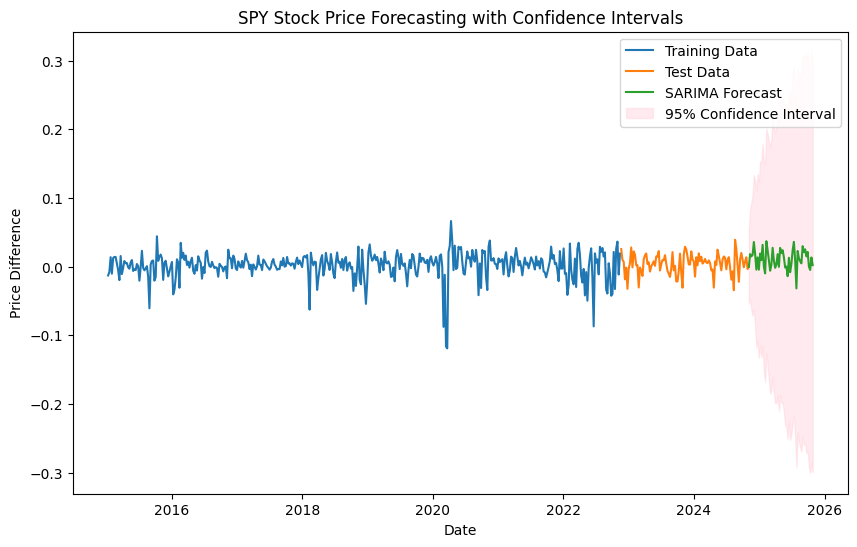

In [ ]:
# Forecasting with confidence intervals
forecast_object = model_fit.get_forecast(steps=52)  # Adjust steps as needed
forecast_mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# Create forecast dates (assuming test_data.index[-1] is the last date of your training data)
forecast_dates = pd.date_range(start=test_data.index[-1], periods=52, freq='W')  # Adjust 'freq' as needed (e.g., 'D' for daily)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_dates, forecast_mean, label='SARIMA Forecast')
plt.fill_between(forecast_dates,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')
plt.legend()
plt.title("SPY Stock Price Forecasting with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to store forecasted data and confidence intervals
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Mean': forecast_mean,
    'Lower_95_CI': conf_int.iloc[:, 0],
    'Upper_95_CI': conf_int.iloc[:, 1]
})

# Save to a CSV file
forecast_df.to_csv('/content/drive/My Drive/10Academy/week11/SPY_Weekly_forecasted_data.csv', index=False)

# Display the first few rows to verify
print(forecast_df.head())


                                               Date  Forecasted_Mean  \
2022-11-20 00:00:00+00:00 2024-11-03 00:00:00+00:00        -0.000297   
2022-11-27 00:00:00+00:00 2024-11-10 00:00:00+00:00         0.018284   
2022-12-04 00:00:00+00:00 2024-11-17 00:00:00+00:00         0.014860   
2022-12-11 00:00:00+00:00 2024-11-24 00:00:00+00:00         0.017013   
2022-12-18 00:00:00+00:00 2024-12-01 00:00:00+00:00         0.035865   

                           Lower_95_CI  Upper_95_CI  
2022-11-20 00:00:00+00:00    -0.053762     0.053168  
2022-11-27 00:00:00+00:00    -0.047349     0.083917  
2022-12-04 00:00:00+00:00    -0.063332     0.093053  
2022-12-11 00:00:00+00:00    -0.071381     0.105408  
2022-12-18 00:00:00+00:00    -0.061826     0.133557  


**LSTM**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3419
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0664 
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134
Epoch 16/20
13/13 ━━━━━━━━

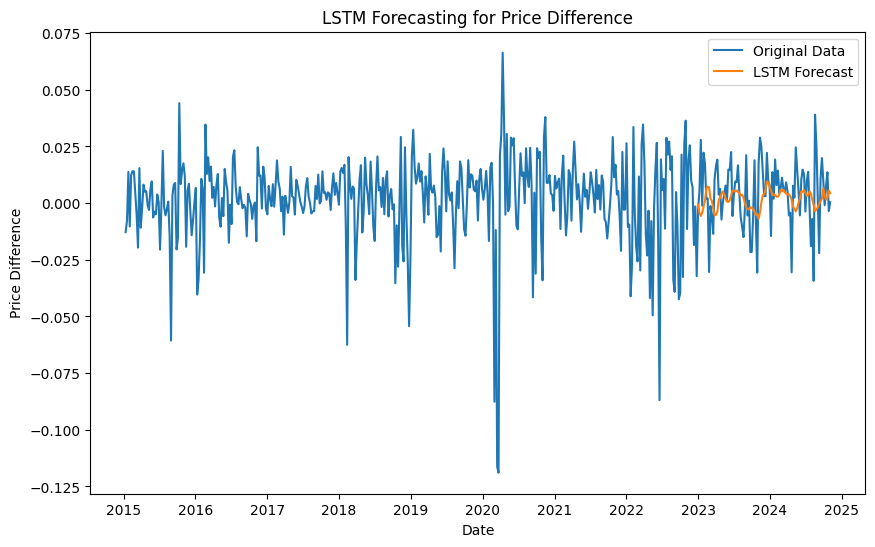

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Split data
train_data = data_new['Price_Diff'][:int(0.8 * len(data_new['Price_Diff']))]
test_data = data_new['Price_Diff'][int(0.8 * len(data_new['Price_Diff'])):]

# Scale the data (LSTM works better with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Prepare the data for LSTM (X, y pairs)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 6  # Look back 60 time steps
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input data for LSTM: [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer for forecasting

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Forecasting
forecast_scaled = model.predict(X_test)

# Inverse transform to get actual values back
forecast = scaler.inverse_transform(forecast_scaled)

# Calculate performance metrics
mae = mean_absolute_error(test_data[time_step:], forecast)
mse = mean_squared_error(test_data[time_step:], forecast)
rmse = np.sqrt(mse)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data_new['Price_Diff'], label='Original Data')
plt.plot(test_data.index[time_step:], forecast, label='LSTM Forecast')
plt.legend()
plt.title("LSTM Forecasting for Price Difference")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()
